In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("sales_data_with_discounts.csv")
print(df.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [94]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [96]:
df.shape

(450, 13)

In [97]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [98]:
# Total nulls in each column
print(df.isnull().sum())


Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64


In [99]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
445,False
446,False
447,False
448,False


In [100]:
df.nunique()

,0
Date,15
Day,7
SKU,30
City,1
Volume,22
BU,3
Brand,9
Model,30
Avg Price,25
Total Sales Value,135


In [101]:
# Drop City column
df = df.drop(columns=["City"])

In [102]:
df.shape

(450, 12)

In [103]:
num_cols = ["Volume", "Avg Price", "Total Sales Value",
            "Discount Rate (%)", "Discount Amount", "Net Sales Value"]

# Calculate directly
stats = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Mode": df[num_cols].mode().iloc[0],
    "Standard Deviation": df[num_cols].std()
})

print(stats)


                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


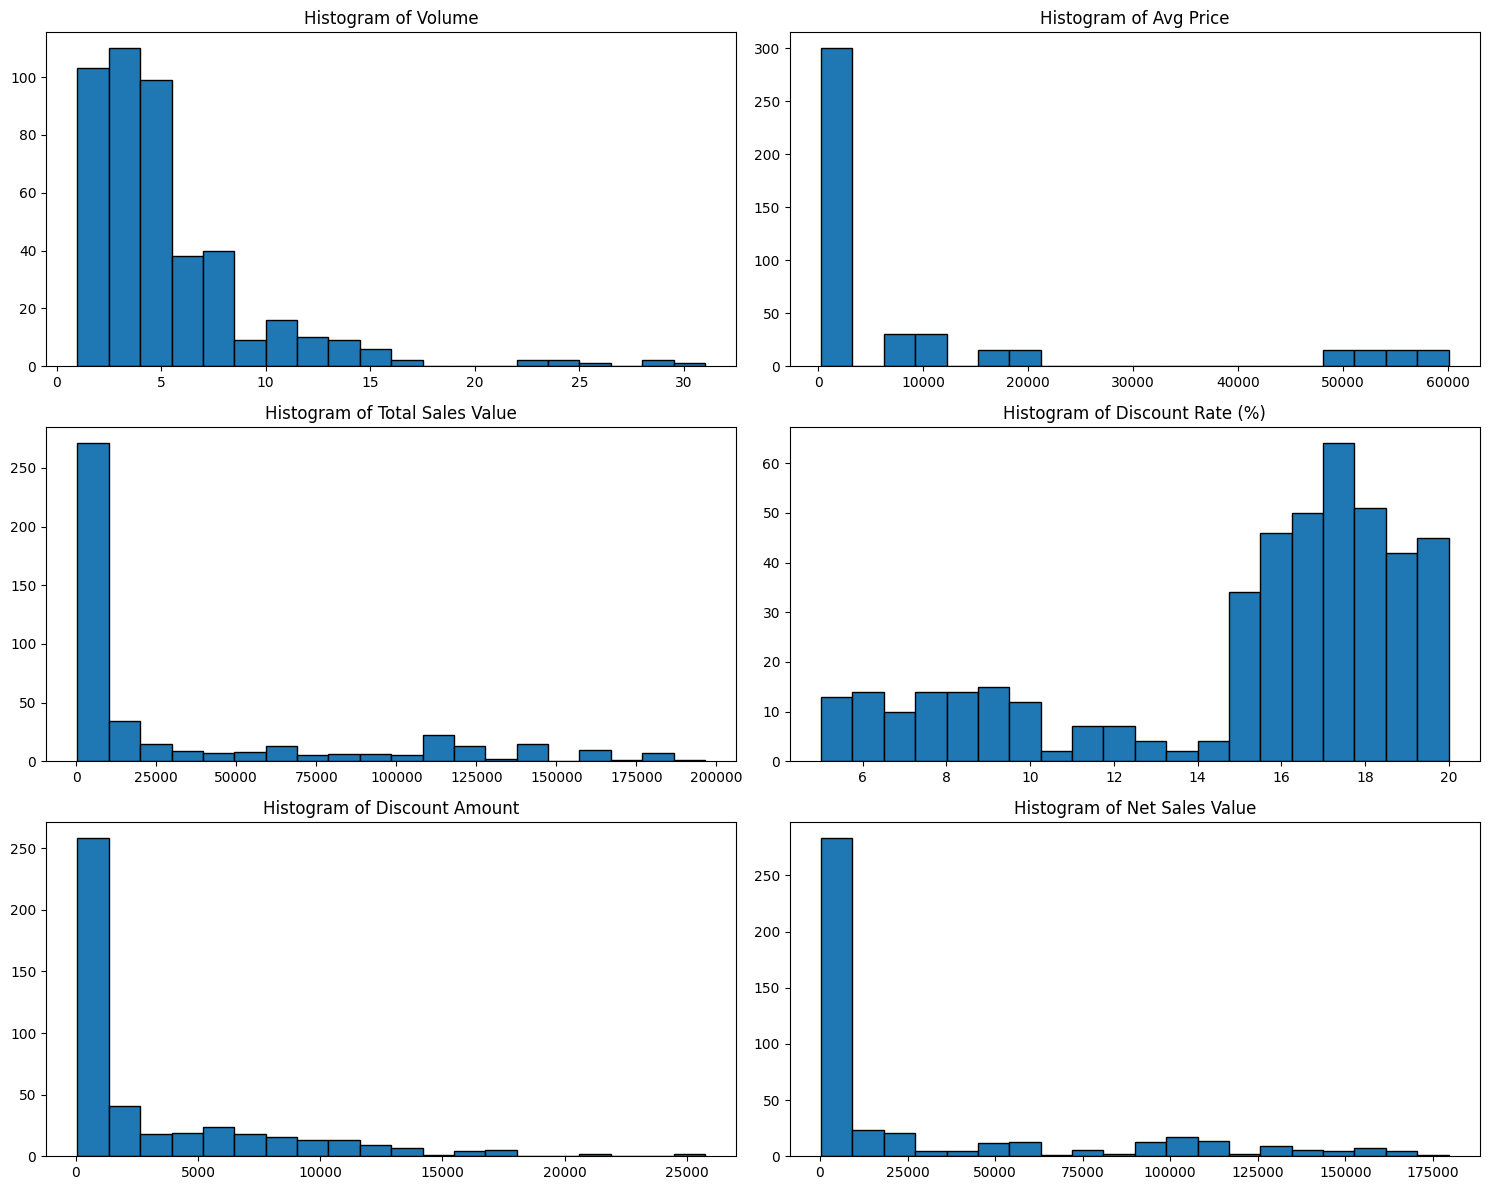

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# 1. Volume
plt.subplot(3, 2, 1)
plt.hist(df['Volume'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Volume")

# 2. Avg Price
plt.subplot(3, 2, 2)
plt.hist(df['Avg Price'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Avg Price")

# 3. Total Sales Value
plt.subplot(3, 2, 3)
plt.hist(df['Total Sales Value'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Total Sales Value")

# 4. Discount Rate (%)
plt.subplot(3, 2, 4)
plt.hist(df['Discount Rate (%)'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Discount Rate (%)")

# 5. Discount Amount
plt.subplot(3, 2, 5)
plt.hist(df['Discount Amount'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Discount Amount")

# 6. Net Sales Value
plt.subplot(3, 2, 6)
plt.hist(df['Net Sales Value'].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Net Sales Value")

plt.tight_layout()
plt.show()

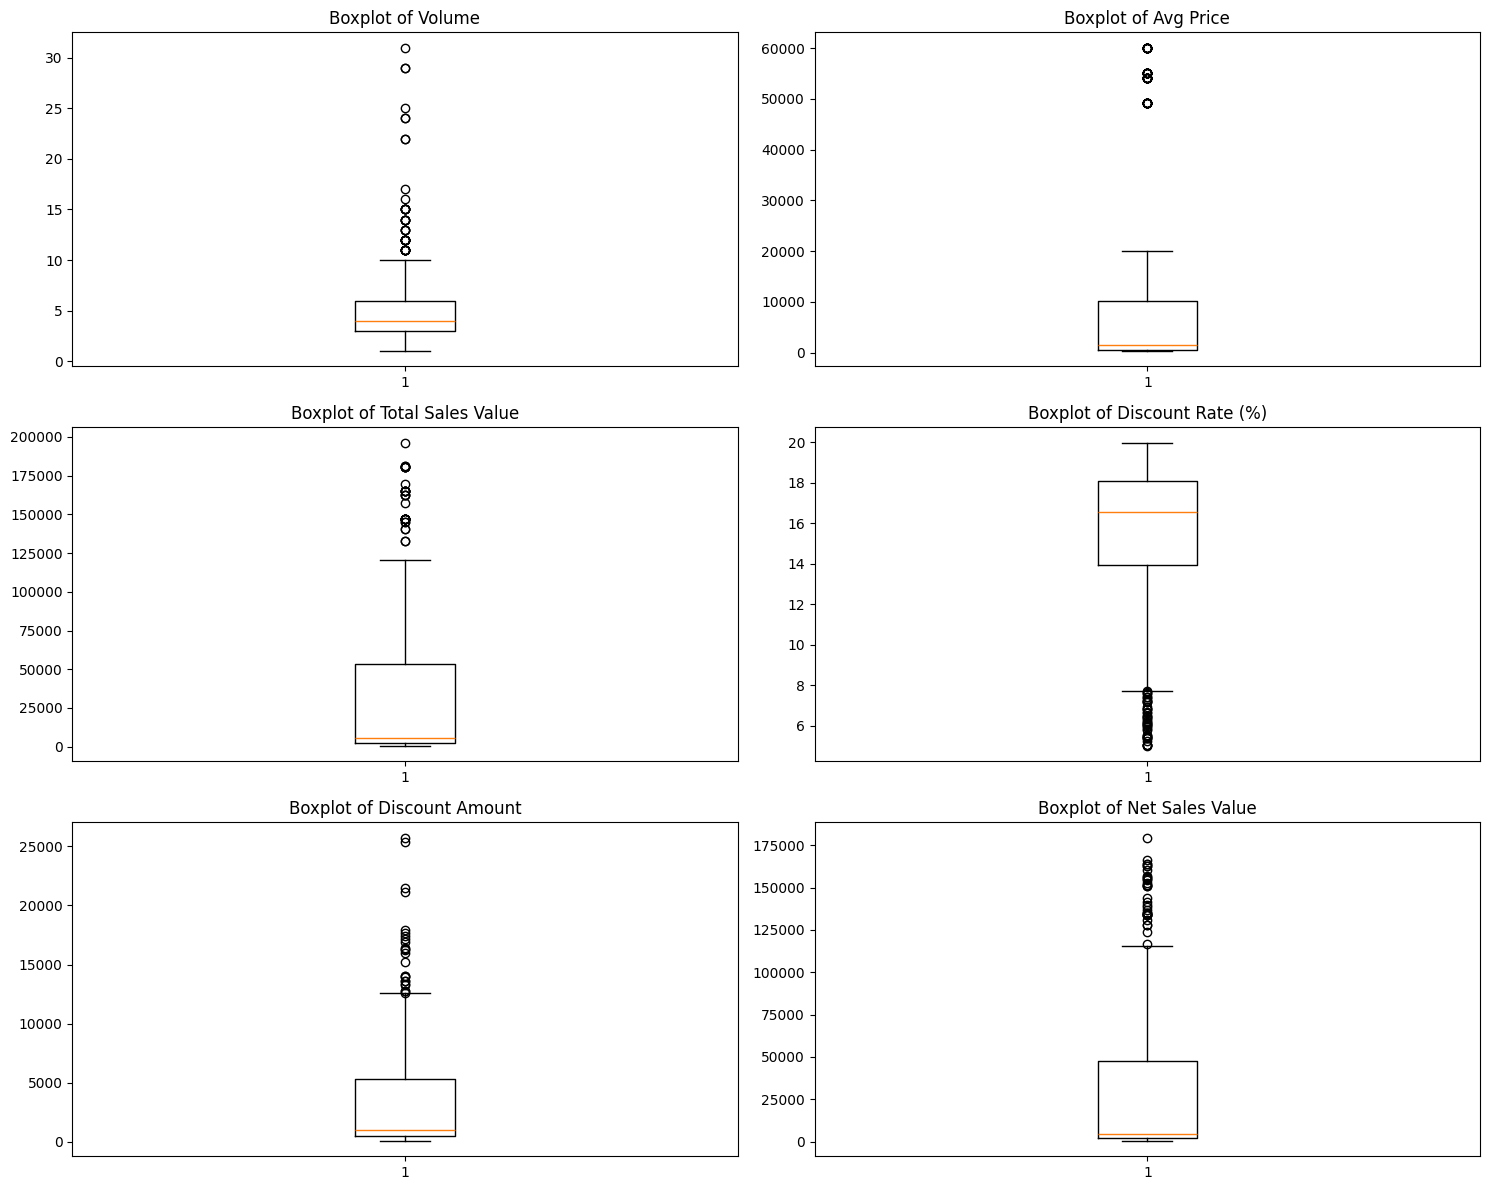

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# 1. Volume
plt.subplot(3, 2, 1)
plt.boxplot(df['Volume'].dropna())
plt.title("Boxplot of Volume")

# 2. Avg Price
plt.subplot(3, 2, 2)
plt.boxplot(df['Avg Price'].dropna())
plt.title("Boxplot of Avg Price")

# 3. Total Sales Value
plt.subplot(3, 2, 3)
plt.boxplot(df['Total Sales Value'].dropna())
plt.title("Boxplot of Total Sales Value")

# 4. Discount Rate (%)
plt.subplot(3, 2, 4)
plt.boxplot(df['Discount Rate (%)'].dropna())
plt.title("Boxplot of Discount Rate (%)")

# 5. Discount Amount
plt.subplot(3, 2, 5)
plt.boxplot(df['Discount Amount'].dropna())
plt.title("Boxplot of Discount Amount")

# 6. Net Sales Value
plt.subplot(3, 2, 6)
plt.boxplot(df['Net Sales Value'].dropna())
plt.title("Boxplot of Net Sales Value")

plt.tight_layout()
plt.show()

In [106]:
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

for col in ["Volume", "Avg Price", "Total Sales Value", "Discount Rate (%)", "Discount Amount", "Net Sales Value"]:
    print(f"{col} → Outliers count: {find_outliers(df[col]).shape[0]}")


Volume → Outliers count: 44
Avg Price → Outliers count: 60
Total Sales Value → Outliers count: 36
Discount Rate (%) → Outliers count: 45
Discount Amount → Outliers count: 24
Net Sales Value → Outliers count: 35


In [107]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", cat_cols)


Categorical Columns: Index(['Date', 'Day', 'SKU', 'BU', 'Brand', 'Model'], dtype='object')


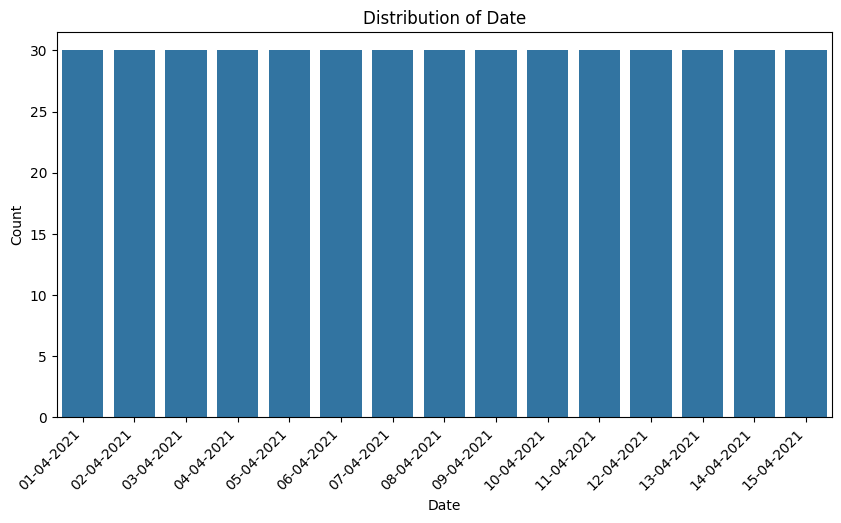

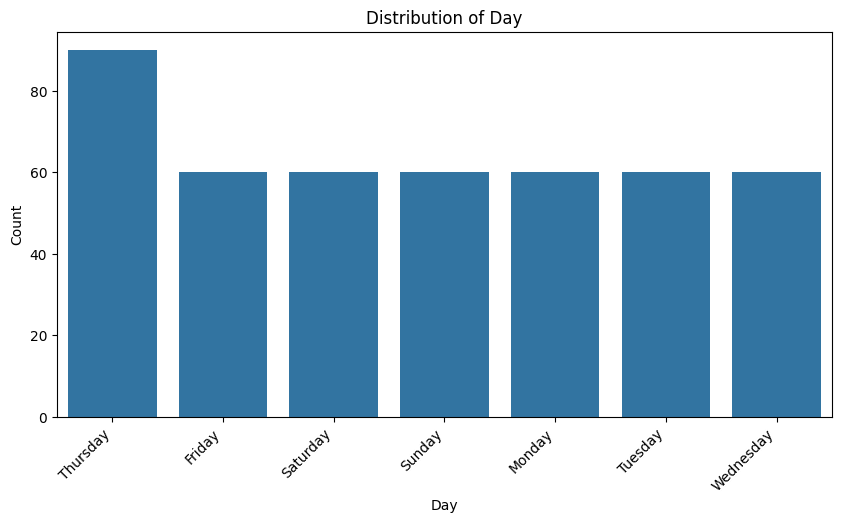

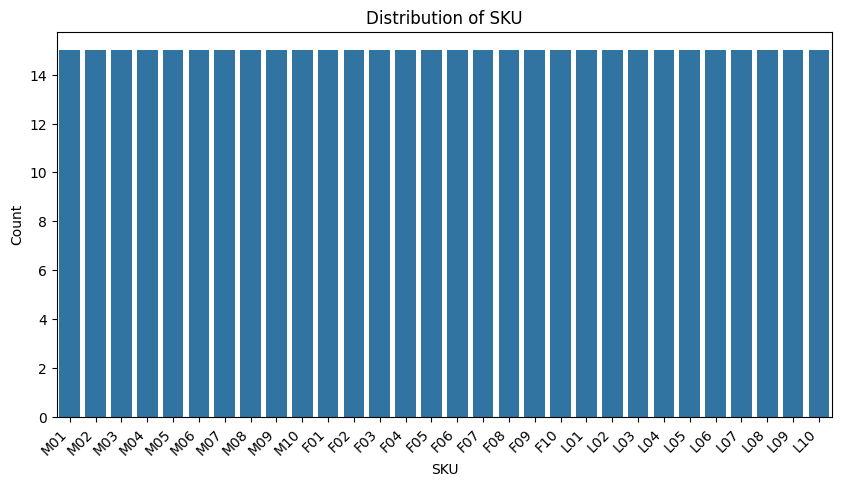

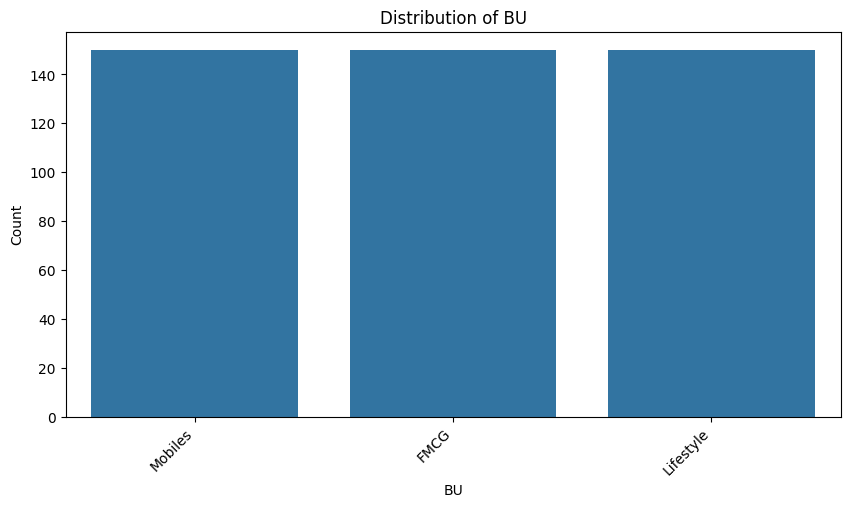

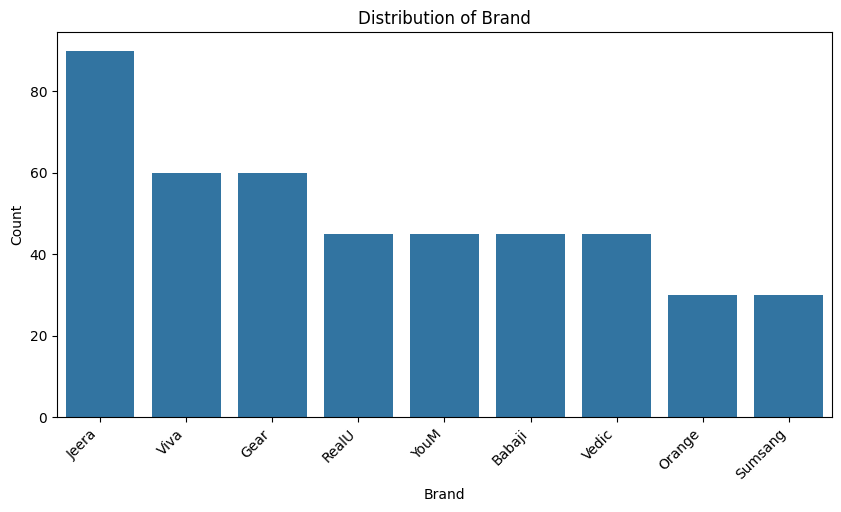

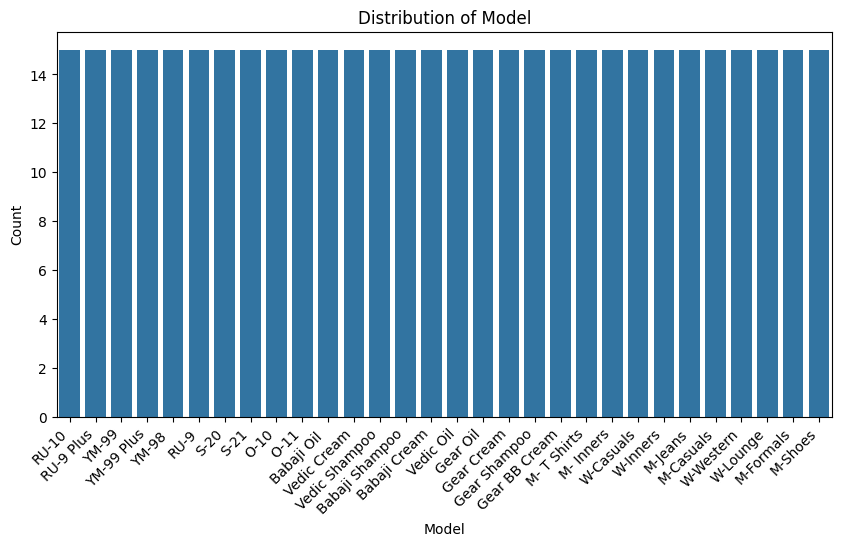

In [108]:
cat_cols = ['Date', 'Day', 'SKU', 'BU', 'Brand', 'Model']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


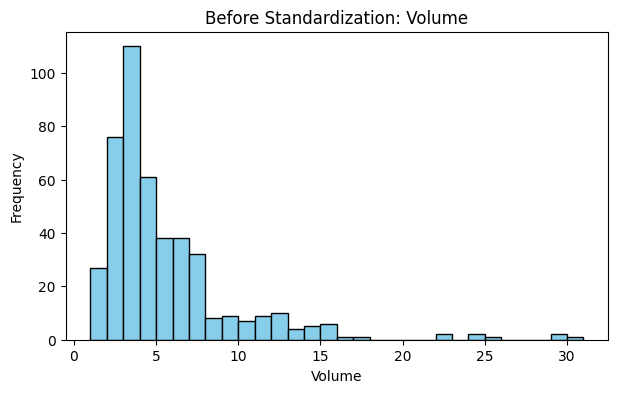

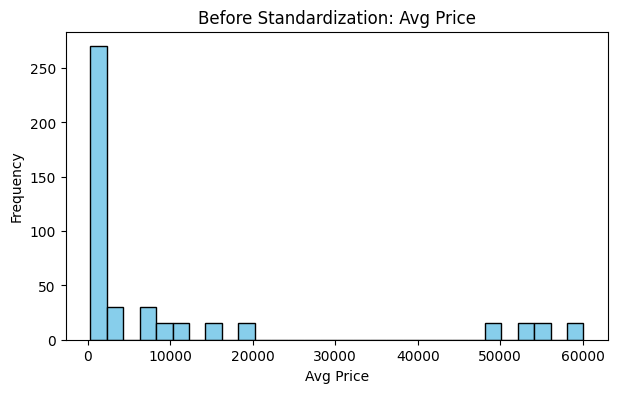

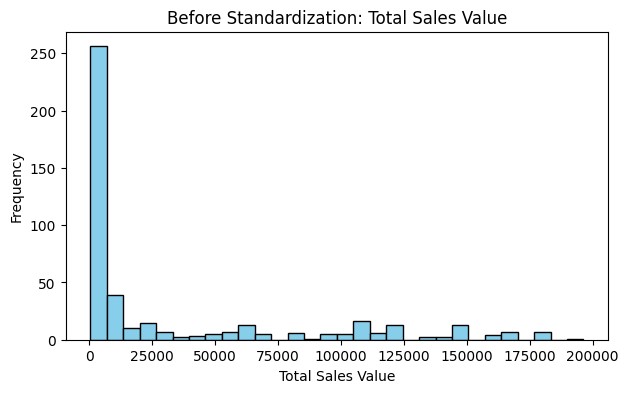

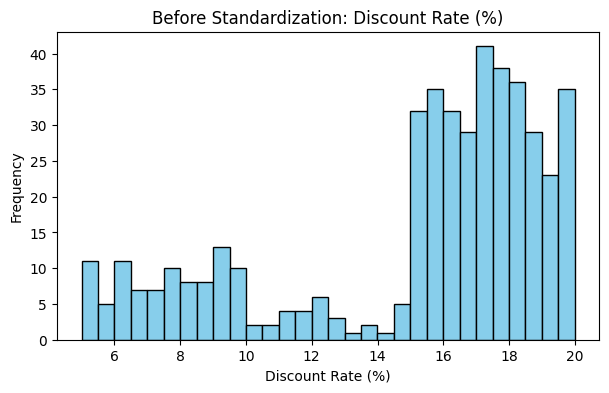

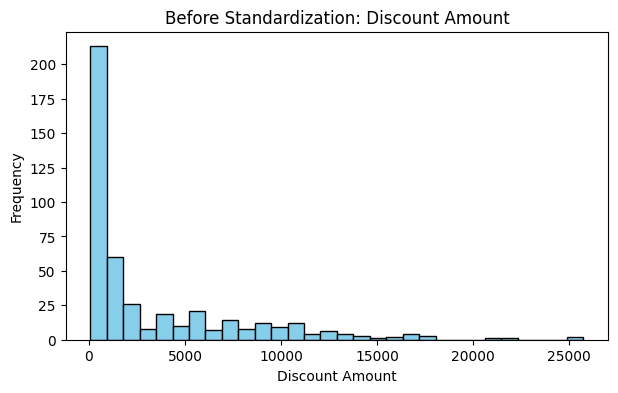

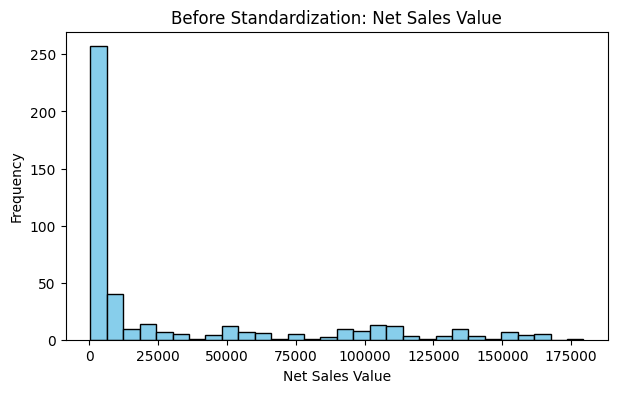

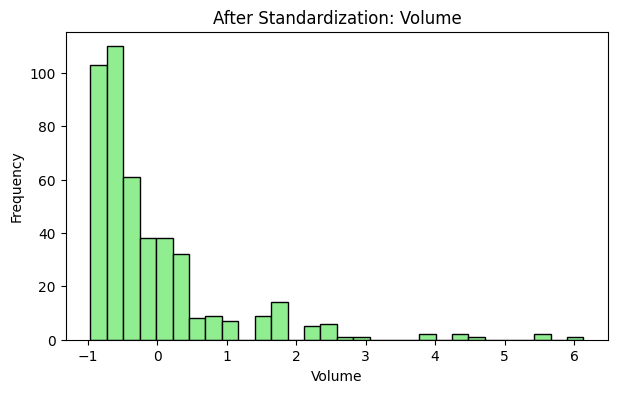

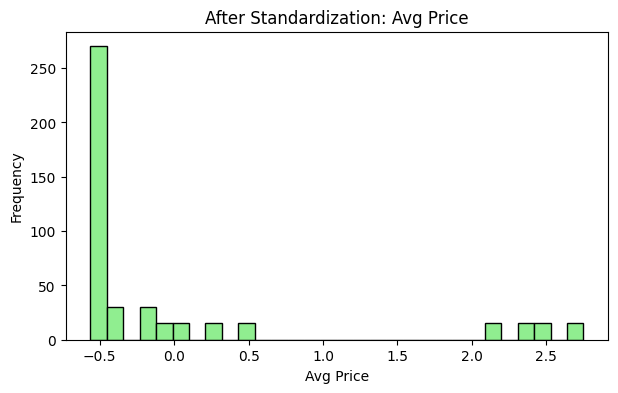

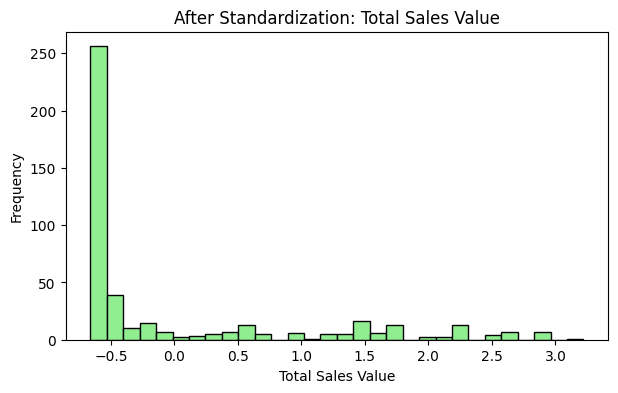

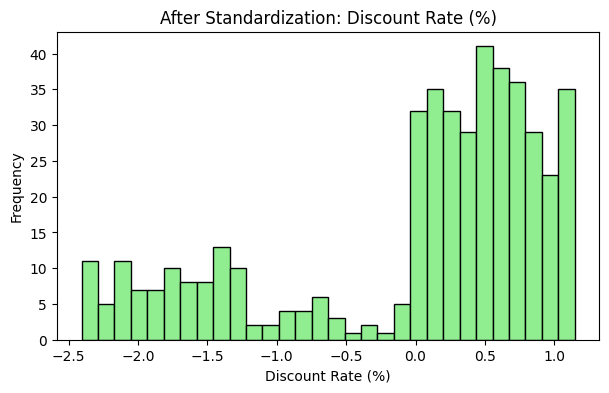

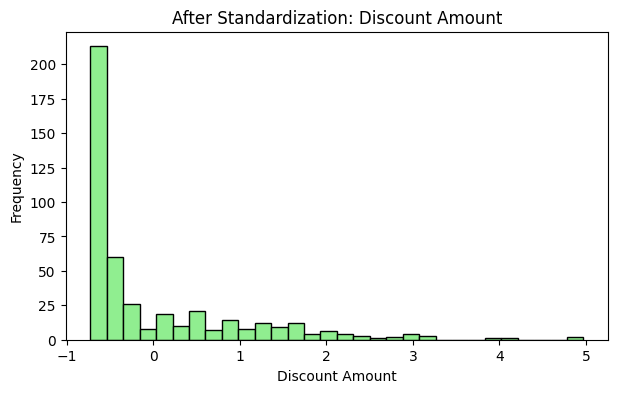

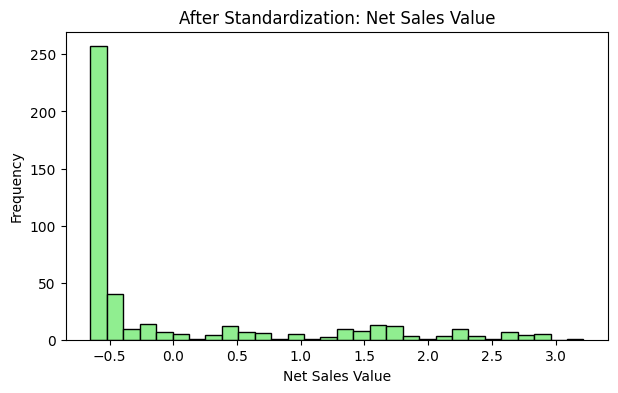

In [109]:
from sklearn.preprocessing import StandardScaler
# Step 1: Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", num_cols)

# Step 2: Before standardization distribution
for col in num_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Before Standardization: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Step 3: Apply Standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 4: After standardization distribution
for col in num_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"After Standardization: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [110]:
cat_cols = ['Date', 'Day', 'SKU', 'BU', 'Brand', 'Model']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
# drop_first=True → avoid dummy variable trap (optional)

# Show first 5 rows
print(df_encoded.head())


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756             True            False            False   
1         1.271026             True            False            False   
2         1.545675             True            False            False   
3         1.765810             True            False            False   
4        -0.227595             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

In [111]:
# Directly create dummies as integers
df_encoded = pd.get_dummies(df, columns=['Date','Day','SKU','BU','Brand','Model'], dtype=int)
print(df_encoded.head())


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756                1                0                0   
1         1.271026                1                0                0   
2         1.545675                1                0                0   
3         1.765810                1                0                0   
4        -0.227595                1                0                0   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

Descriptive analysis and visualizations helped in understanding how sales, discounts, and prices are distributed in the dataset. Some products show much higher sales and prices than others, indicating that a few large transactions have a strong impact. Boxplots and histograms helped identify outliers, while bar charts highlighted better-performing product categories. Data preprocessing steps such as standardization made all numerical values comparable, and one-hot encoding converted text data into numbers suitable for machine learning models.